# Premier League 14-15 match day stats

##### Abbreviations of columns explained:
##### FTHG - full time home goals 
##### FTAH - full time away goals
##### FTR - full time result
##### HTHG - half time home goals
##### HTAG - half time away goals
##### HTR - half time result
##### HS - home team shots
##### AS - away team shots
##### HST - home team shots on target
##### AST - away team shots on target
##### HF - home team fouls
##### AF - away team fouls
##### HC - home team corners
##### AC - away team corners
##### HY - home team yellow card
##### AY - away team yellow card
##### HR - Home Team Red Cards
##### AR - Away Team Red Cards

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
football = pd.read_csv('E0.csv')

In [4]:
# reading first five rows of dataset to understand it.
football.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,2.10,24.0,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,1.80,22.0,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47
2,E0,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,...,2.13,25.0,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25
3,E0,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,...,1.58,24.0,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59
4,E0,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,...,1.60,23.0,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51


In [5]:
football.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.473684,1.092105,0.728947,0.486842,14.623684,11.286842,4.723684,3.681579,11.244737,11.444737,...,1.924605,26.863158,-0.323026,1.978605,1.921842,2.014105,1.951947,2.749684,4.055605,4.804342
std,1.263175,1.069826,0.861185,0.706050,5.519260,4.594288,2.496429,2.042084,3.347208,3.525197,...,0.268800,2.427244,0.783295,0.138140,0.129290,0.151468,0.137349,1.607906,1.010234,3.570114
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,1.470000,12.000000,-2.000000,1.650000,1.590000,1.630000,1.570000,1.160000,3.080000,1.380000
25%,1.000000,0.000000,0.000000,0.000000,11.000000,8.000000,3.000000,2.000000,9.000000,9.000000,...,1.730000,25.000000,-0.750000,1.880000,1.830000,1.900000,1.850000,1.687500,3.390000,2.460000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,4.000000,3.000000,11.000000,11.000000,...,1.870000,27.000000,-0.250000,1.970000,1.920000,2.000000,1.950000,2.220000,3.670000,3.585000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.000000,13.000000,14.000000,...,2.090000,28.000000,0.250000,2.080000,2.020000,2.100000,2.040000,3.132500,4.325000,5.542500
max,8.000000,6.000000,5.000000,4.000000,43.000000,27.000000,16.000000,11.000000,23.000000,22.000000,...,3.080000,32.000000,1.500000,2.550000,2.460000,2.800000,2.690000,9.500000,8.720000,22.000000


In [6]:
# basic information about dataset
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    float64
 5   FTAG      380 non-null    float64
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    float64
 8   HTAG      380 non-null    float64
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    float64
 12  AS        380 non-null    float64
 13  HST       380 non-null    float64
 14  AST       380 non-null    float64
 15  HF        380 non-null    float64
 16  AF        380 non-null    float64
 17  HC        380 non-null    float64
 18  AC        380 non-null    float64
 19  HY        380 non-null    float64
 20  AY        380 non-null    float6

In [37]:
# deleting 'Div'column from dataset
football_new = football.drop(['Div','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD',
                              'PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','Bb1X2','BbMxH','BbAvH',
                              'BbMxD','BbAvD','BbMxA','PSCH','PSCD','PSCA','BbAvAHA','BbMxAHA','BbAvAHH','BbMxAHH','BbAHh',
                              'BbAH','BbAv<2.5','BbMx<2.5','BbAv>2.5','BbMx>2.5','BbOU','BbAvA'], axis = 1)

In [38]:
football_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,J Moss,...,6.0,2.0,13.0,19.0,9.0,3.0,2.0,2.0,0.0,1.0
1,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,M Jones,...,3.0,3.0,16.0,10.0,3.0,6.0,1.0,1.0,0.0,0.0
2,16/08/14,Man United,Swansea,1.0,2.0,A,0.0,1.0,A,M Dean,...,5.0,4.0,14.0,20.0,4.0,0.0,2.0,4.0,0.0,0.0
3,16/08/14,QPR,Hull,0.0,1.0,A,0.0,0.0,D,C Pawson,...,6.0,4.0,10.0,10.0,8.0,9.0,1.0,2.0,0.0,0.0
4,16/08/14,Stoke,Aston Villa,0.0,1.0,A,0.0,0.0,D,A Taylor,...,2.0,2.0,14.0,9.0,2.0,8.0,0.0,3.0,0.0,0.0


In [39]:
football_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      380 non-null    object 
 1   HomeTeam  380 non-null    object 
 2   AwayTeam  380 non-null    object 
 3   FTHG      380 non-null    float64
 4   FTAG      380 non-null    float64
 5   FTR       380 non-null    object 
 6   HTHG      380 non-null    float64
 7   HTAG      380 non-null    float64
 8   HTR       380 non-null    object 
 9   Referee   380 non-null    object 
 10  HS        380 non-null    float64
 11  AS        380 non-null    float64
 12  HST       380 non-null    float64
 13  AST       380 non-null    float64
 14  HF        380 non-null    float64
 15  AF        380 non-null    float64
 16  HC        380 non-null    float64
 17  AC        380 non-null    float64
 18  HY        380 non-null    float64
 19  AY        380 non-null    float64
 20  HR        380 non-null    float6

In [45]:
# chart of total home goals scored and total away goals scored
# below is the bar plot
total_home_goals = football_new['FTHG'].sum()
print('total home goals scored in 2014-15 = ',total_home_goals)
total_away_goals = football_new['FTAG'].sum()
print('total away goals scored in 2014-15 = ',total_away_goals)

total home goals scored in 2014-15 =  560.0
total away goals scored in 2014-15 =  415.0


### Chart of full time home goals vs full time away goals

<AxesSubplot:>

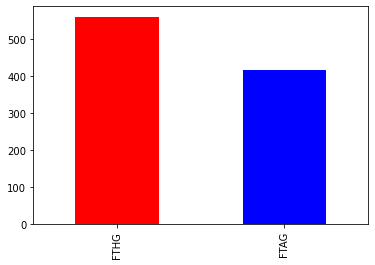

In [66]:
football_new[['FTHG','FTAG']].sum().plot.bar(color = ['red', 'blue'])

### Chart of half time home goals vs half time away goals

<AxesSubplot:>

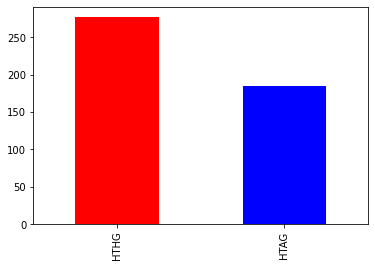

In [81]:
football_new[['HTHG','HTAG']].sum().plot.bar(color = ['red', 'blue'])

Text(0, 0.5, 'goals')

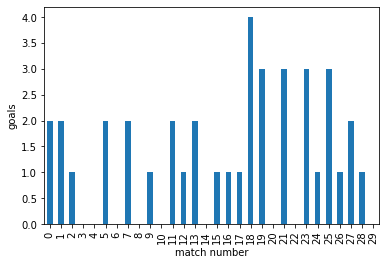

In [61]:
# total home goals scored by teams of first 30 matches
football_new['FTHG'][:30].plot.bar()
plt.xlabel('match number')
plt.ylabel('goals')

### from the above plot bar we can say that least goal scored is 0 and most goals scored is 4 in first 30 matches by home team.

Text(0, 0.5, 'goals')

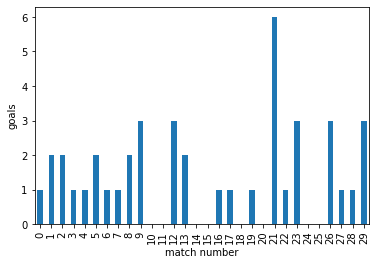

In [57]:
# total away goals scored by teams of first 30 matches
football_new['FTAG'][:30].plot.bar()
plt.xlabel('match number')
plt.ylabel('goals')

<AxesSubplot:>

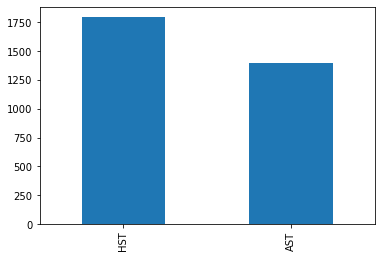

In [67]:
football_new[['HST','AST']].sum().plot.bar()

### by the above graph we can say that Home team is much more attacking than away team

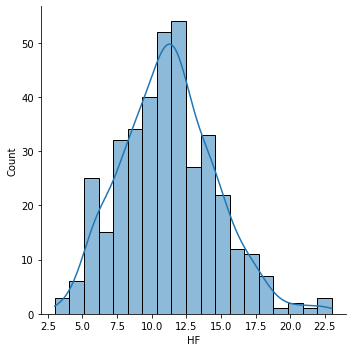

In [73]:
sns.displot(football_new['HF'], kde = 1)

### From the above distribution plot we can say that at in more than 50 matches home team commited at least 12.5 fouls

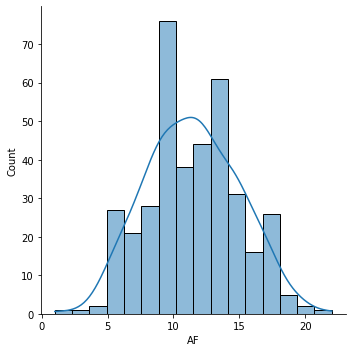

In [74]:
sns.displot(football_new['AF'], kde = 1)

### while away teams are also commiting near by 10 fouls per game in 70 matches.
### by this we can infer that both home and away teams are were playing offensive games during 14-15 season.

In [77]:
slices = football_new.groupby('FTR')['HST'].sum()
slices

FTR
A    415.0
D    389.0
H    991.0
Name: HST, dtype: float64

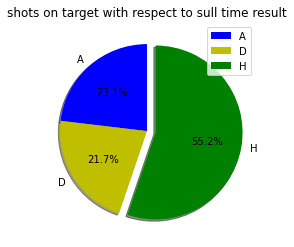

In [80]:
## Maplotlib - pie plot
cols = ['b','y','g']
FTR = slices.index

plt.pie(slices,
        labels = FTR,
        colors = cols,
        startangle = 90,
        shadow = True,
        explode = (0,0,0.1),
        autopct = "%1.1f%%")

plt.title('shots on target with respect to sull time result')
plt.legend()

### We can clearly see that home team has more shots on target and they are winning too. By this we can clearly infer that
### home team are much more of a dominating side when they play at home.